In [1]:
import numpy as np
import pandas as pd

In [2]:
hd_df = pd.read_csv("D:\Datascience\Kaggle\Data\Heart_disease_statlog.csv")

In [3]:
hd_df.shape

(270, 14)

The data is very small. I will be making my judgements using it (ignoring the size of the data).

In [4]:
hd_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [5]:
hd_df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
33,59,1,3,170,326,0,2,140,1,3.4,2,0,3,1
8,60,1,3,140,293,0,2,170,0,1.2,1,2,3,1
240,68,1,2,180,274,1,2,150,1,1.6,1,0,3,1
174,34,1,0,118,182,0,2,174,0,0.0,0,0,1,0
250,54,1,3,120,188,0,0,113,0,1.4,1,1,3,1


In [6]:
hd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


No missing values found

 But we can see all values are numeric in the data. We will change these as per the above description

In [95]:
hd_df[['sex','fbs','cp','restecg','exang','slope','ca','thal','target']] = hd_df[['sex','fbs','cp','restecg','exang','slope','ca','thal','target']].astype(str)

In [9]:
hd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    object 
 2   cp        270 non-null    object 
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    object 
 6   restecg   270 non-null    object 
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    object 
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    object 
 11  ca        270 non-null    object 
 12  thal      270 non-null    object 
 13  target    270 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 29.7+ KB


There are 5 numerical variables and 9 categorical variables (including the target variable)

Numerical - Age, trestbps, chol, thalach, oldpeak

Categorical - sex, cp, fbs, restecg, exang, slope, ca, thal, target

In [10]:
hd_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [11]:
hd_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

As expected no nulls found

In [12]:
hd_df.describe()

,age,trestbps,chol,thalach,oldpeak
count,270.000000,270.000000,270.000000,270.000000,270.00000
mean,54.433333,131.344444,249.659259,149.677778,1.05000
std,9.109067,17.861608,51.686237,23.165717,1.14521
min,29.000000,94.000000,126.000000,71.000000,0.00000
25%,48.000000,120.000000,213.000000,133.000000,0.00000
50%,55.000000,130.000000,245.000000,153.500000,0.80000
75%,61.000000,140.000000,280.000000,166.000000,1.60000
max,77.000000,200.000000,564.000000,202.000000,6.20000


In [13]:
hd_df.duplicated().sum()

0

No duplicates found

In [14]:
hd_df.corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.273053,0.220056,-0.402215,0.194234
trestbps,0.273053,1.000000,0.173019,-0.039136,0.222800
chol,0.220056,0.173019,1.000000,-0.018739,0.027709
thalach,-0.402215,-0.039136,-0.018739,1.000000,-0.349045
oldpeak,0.194234,0.222800,0.027709,-0.349045,1.000000


Greatest correlation b/w thalach and age of -.4022. One of the columns can be considered to be removed while training the model

# Univariate Analysis - Categorical
Categorical features - sex, cp, fbs, restecg, exang, slope, ca, thal, target

In [15]:
import seaborn as sns

In [16]:
hd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    object 
 2   cp        270 non-null    object 
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    object 
 6   restecg   270 non-null    object 
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    object 
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    object 
 11  ca        270 non-null    object 
 12  thal      270 non-null    object 
 13  target    270 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 29.7+ KB


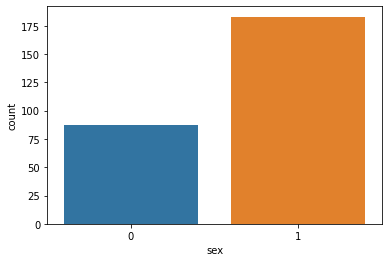

In [17]:
sns.countplot(hd_df['sex'])

Male(1) > Female(0)

In [18]:
import matplotlib.pyplot as plt

In [19]:
hd_df['sex'].value_counts()

1    183
0     87
Name: sex, dtype: int64

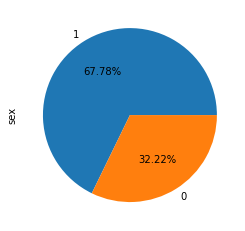

In [20]:
hd_df['sex'].value_counts().plot(kind = 'pie',autopct='%.2f%%')

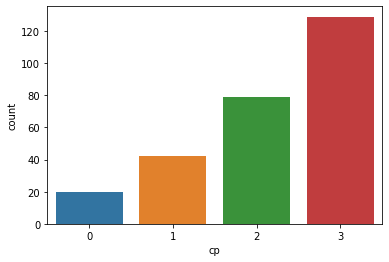

In [21]:
sns.countplot(hd_df['cp'])

In [22]:
hd_df['cp'].value_counts()

3    129
2     79
1     42
0     20
Name: cp, dtype: int64

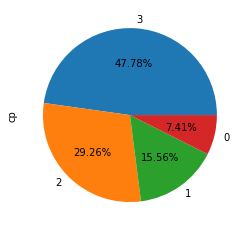

In [23]:
hd_df['cp'].value_counts().plot(kind = 'pie',autopct='%.2f%%')

cp is the 'type of chest pain experienced by patient'. 
This term is categorized into 4 category:
0 typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal)
The above barplot shows that asymptomatic type of chest pain is the maximum (47.78%) which patients experience.


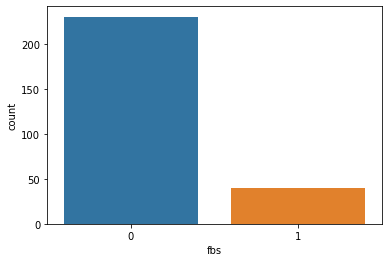

In [24]:
sns.countplot(hd_df['fbs'])

In [25]:
hd_df['fbs'].value_counts()

0    230
1     40
Name: fbs, dtype: int64

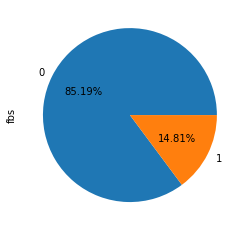

In [26]:
hd_df['fbs'].value_counts().plot(kind = 'pie',autopct='%.2f%%')

fbs is blood sugar levels on fasting. 

14.8% people affected by high blood sugar levels. 

In [27]:
hd_df['restecg'].value_counts()

2    137
0    131
1      2
Name: restecg, dtype: int64

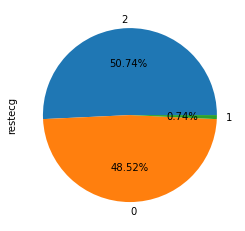

In [28]:
hd_df['restecg'].value_counts().plot(kind = 'pie',autopct='%.2f%%')

restecg has three categories - 0,1,2. 0:Normal, 1: having ST-T wave abnormality and 2: showing probable or definite left ventricular hypertrophyby Estes' criteria. 

The above pie chart shows that category 2 has the highest stake of 50.7% (showing probable or definite left ventricular hypertrophyby Estes' criteria). 

In [29]:
hd_df['exang'].value_counts()

0    181
1     89
Name: exang, dtype: int64

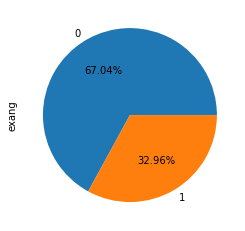

In [30]:
hd_df['exang'].value_counts().plot(kind = 'pie',autopct='%.2f%%')

exang is Angina (type of chest pain caused by reduced blood flow to the heart) induced by exercise. 

33% of the people affected by exang.

In [31]:
hd_df['slope'].value_counts()

0    130
1    122
2     18
Name: slope, dtype: int64

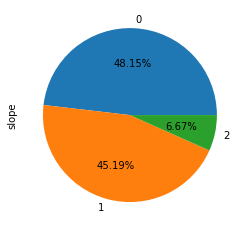

In [32]:
hd_df['slope'].value_counts().plot(kind = 'pie',autopct='%.2f%%')

Slope is ST segment measured in terms of slope during peak exercise

0: up sloping, 1: flat, 2:down sloping

The ST segment refers to the flat section of an electrocardiogram (ECG) reading and represents the interval between jagged heartbeats.

In [33]:
hd_df['ca'].value_counts()

0    160
1     58
2     33
3     19
Name: ca, dtype: int64

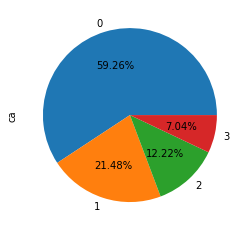

In [34]:
hd_df['ca'].value_counts().plot(kind = 'pie',autopct='%.2f%%')

ca: The number of major vessels (0-3). This is the number of vessels affected during heart disease.



In [35]:
hd_df['thal'].value_counts()

1    152
3    104
2     14
Name: thal, dtype: int64

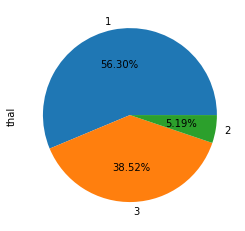

In [36]:
hd_df['thal'].value_counts().plot(kind = 'pie',autopct='%.2f%%')

thal is a blood disorder called thalassemia.
0: Null, 1: normal blood flow, 2: fixed defect(no blood flow in some part of the heart), 3: reversible defect(a blood flow is detected but is not normal)




In [37]:
hd_df['target'].value_counts()

0    150
1    120
Name: target, dtype: int64

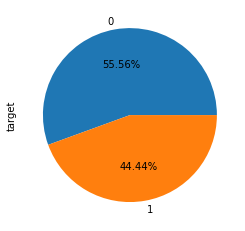

In [38]:
hd_df['target'].value_counts().plot(kind = 'pie',autopct='%.2f%%')

Target variable tells if the person has heart disease or not. 0:no, 1:yes

44% of the sample data people have heart disease.

# Univariate Analysis - Numerical
Numerical features - age, trestbps, chol, thalach, oldpeak

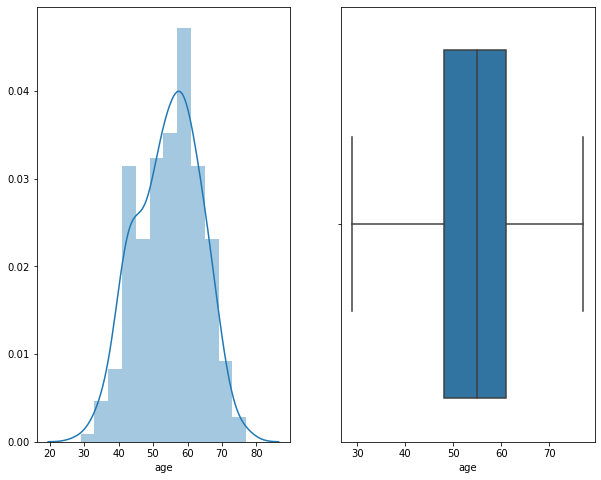

In [41]:
f,ax=plt.subplots(1,2,figsize=(10,8))
sns.distplot(hd_df['age'],ax = ax[0])
sns.boxplot(hd_df['age'],ax=ax[1])
plt.show()

In [42]:
hd_df['age'].describe()

count    270.000000
mean      54.433333
std        9.109067
min       29.000000
25%       48.000000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

The probability density function of Age is almost normally distributed as expected. Mostly people's age vary from age 48-61 .

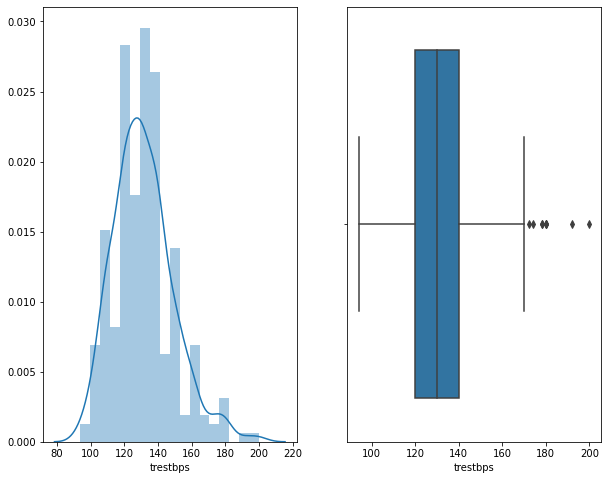

In [43]:
f,ax=plt.subplots(1,2,figsize=(10,8))
sns.distplot(hd_df['trestbps'],ax = ax[0])
sns.boxplot(hd_df['trestbps'],ax=ax[1])
plt.show()

In [44]:
hd_df['trestbps'].describe()

count    270.000000
mean     131.344444
std       17.861608
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

trestbps is the patient's level of blood pressure at resting mode in mm/HG. It mainly variates between 140 to 120.


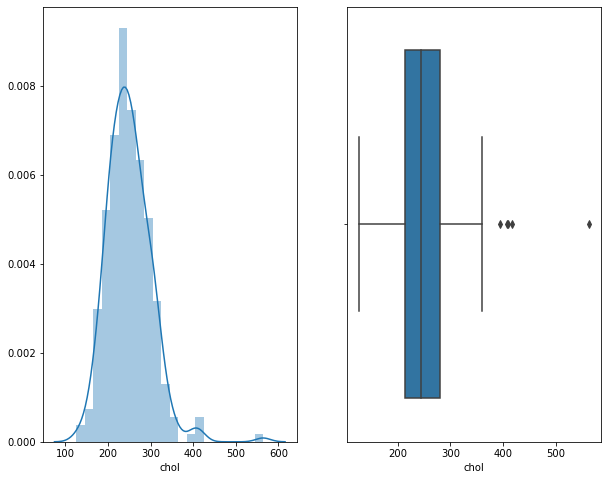

In [45]:
f,ax=plt.subplots(1,2,figsize=(10,8))
sns.distplot(hd_df['chol'],ax = ax[0])
sns.boxplot(hd_df['chol'],ax=ax[1])
plt.show()

In [46]:
hd_df['chol'].describe()

count    270.000000
mean     249.659259
std       51.686237
min      126.000000
25%      213.000000
50%      245.000000
75%      280.000000
max      564.000000
Name: chol, dtype: float64

chol is Serum cholesterol in mg/dl. Mostly between 280 and 213.

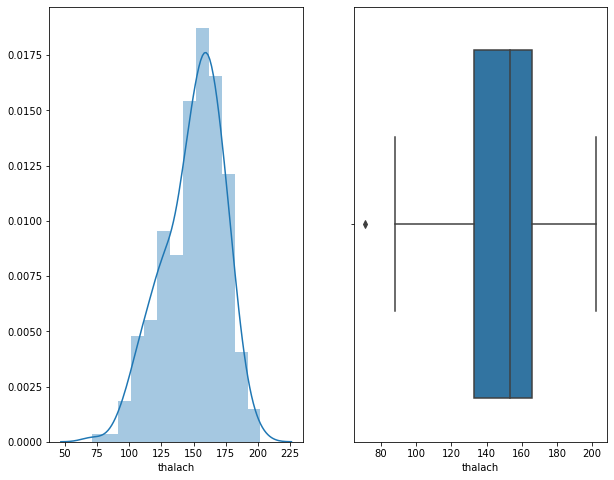

In [47]:
f,ax=plt.subplots(1,2,figsize=(10,8))
sns.distplot(hd_df['thalach'],ax = ax[0])
sns.boxplot(hd_df['thalach'],ax=ax[1])
plt.show()

In [48]:
hd_df['thalach'].describe()

count    270.000000
mean     149.677778
std       23.165717
min       71.000000
25%      133.000000
50%      153.500000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

thalach is Maximum heart rate achieved . mostly varies from 166-133

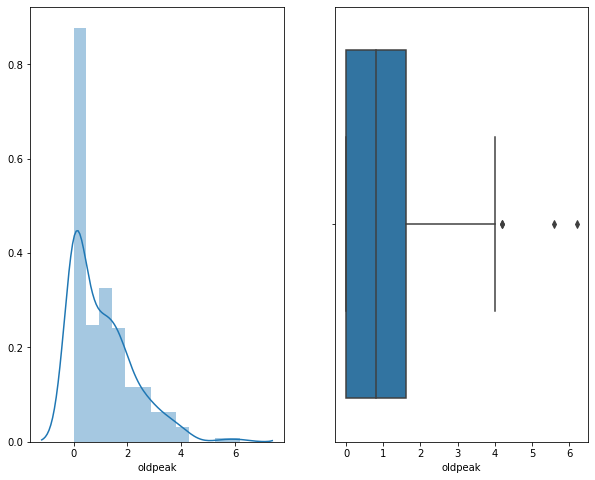

In [49]:
f,ax=plt.subplots(1,2,figsize=(10,8))
sns.distplot(hd_df['oldpeak'],ax = ax[0])
sns.boxplot(hd_df['oldpeak'],ax=ax[1])
plt.show()

In [50]:
hd_df['oldpeak'].describe()

count    270.00000
mean       1.05000
std        1.14521
min        0.00000
25%        0.00000
50%        0.80000
75%        1.60000
max        6.20000
Name: oldpeak, dtype: float64

oldpeak is Exercise induced ST-depression in relative with the state of rest. mostly varies from 1.6 to 0. Its right skewed. And has some outliers on the right.

# Bivariate Analysis

# Numerical-Numerical

In [51]:
hd_df.corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.273053,0.220056,-0.402215,0.194234
trestbps,0.273053,1.000000,0.173019,-0.039136,0.222800
chol,0.220056,0.173019,1.000000,-0.018739,0.027709
thalach,-0.402215,-0.039136,-0.018739,1.000000,-0.349045
oldpeak,0.194234,0.222800,0.027709,-0.349045,1.000000


We can see some correlation between: trestbps and age (27%) , chol and age (22%), thalach and age (-40%)
                                     oldpeak and trestbps (22%)
                                     oldpeak and thalach (-35%)

I have completely ignored correlations below abs(20%) as they are weak. 

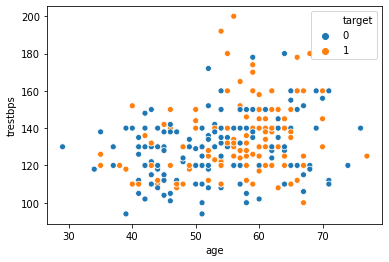

In [52]:
sns.scatterplot(hd_df['age'],hd_df['trestbps'],hue=hd_df['target'])

In [53]:
round(hd_df.corr()['age']['trestbps']*100)

27.0

Does not seem much related

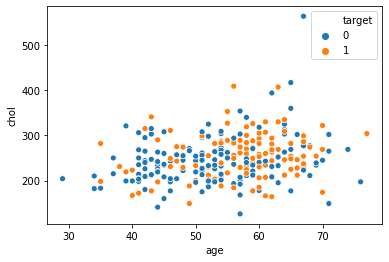

In [54]:
sns.scatterplot(hd_df['age'],hd_df['chol'],hue=hd_df['target'])

In [55]:
round(hd_df.corr()['age']['chol']*100)

22.0

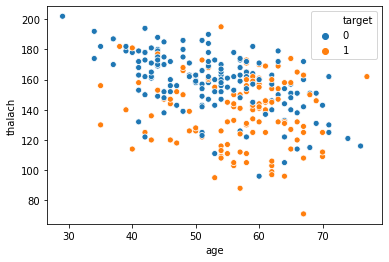

In [56]:
sns.scatterplot(hd_df['age'],hd_df['thalach'],hue=hd_df['target'])

In [57]:
round(hd_df.corr()['age']['thalach']*100)

-40.0

Age and thalach are moderatly negatively correlated. thalach has the strongest correlation with age out of the ones available

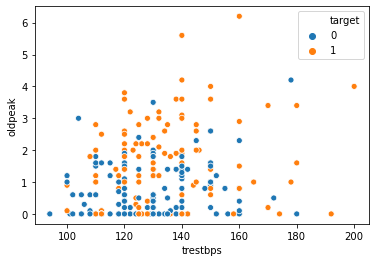

In [58]:
sns.scatterplot(hd_df['trestbps'],hd_df['oldpeak'],hue=hd_df['target'])

In [59]:
round(hd_df.corr()['trestbps']['oldpeak']*100)

22.0

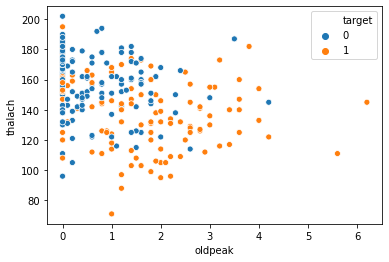

In [60]:
sns.scatterplot(hd_df['oldpeak'],hd_df['thalach'],hue=hd_df['target'])

In [61]:
round(hd_df.corr()['oldpeak']['thalach']*100)

-35.0

# Categorical-Numerical

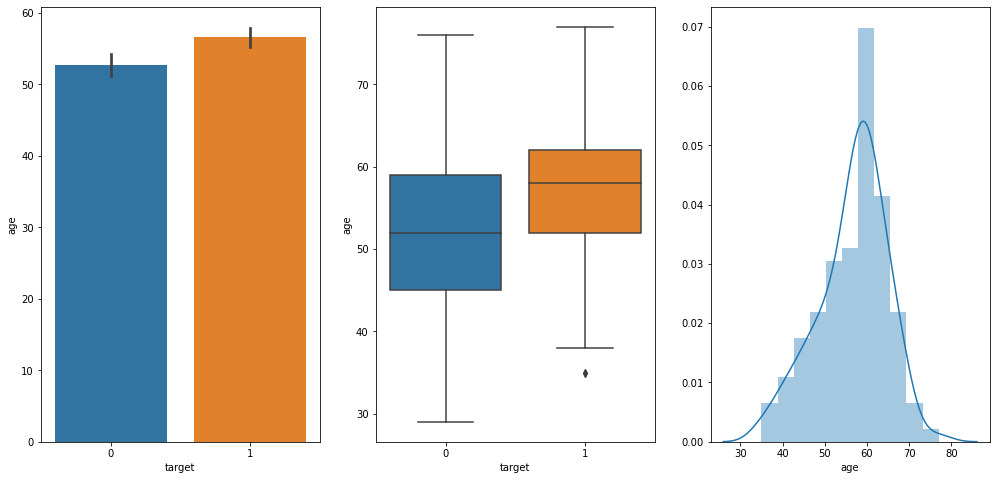

In [62]:
f,ax=plt.subplots(1,3,figsize=(17,8))
sns.barplot(hd_df['target'],hd_df['age'],ax = ax[0])
sns.boxplot(hd_df['target'],hd_df['age'],ax = ax[1])
sns.distplot(hd_df[hd_df['target'] == '1']['age'],ax = ax[2])
plt.show()

We can see that the happening of heart disease becomes more probable at the age of 60 (mostly in the bracket of 52- 65 approx)

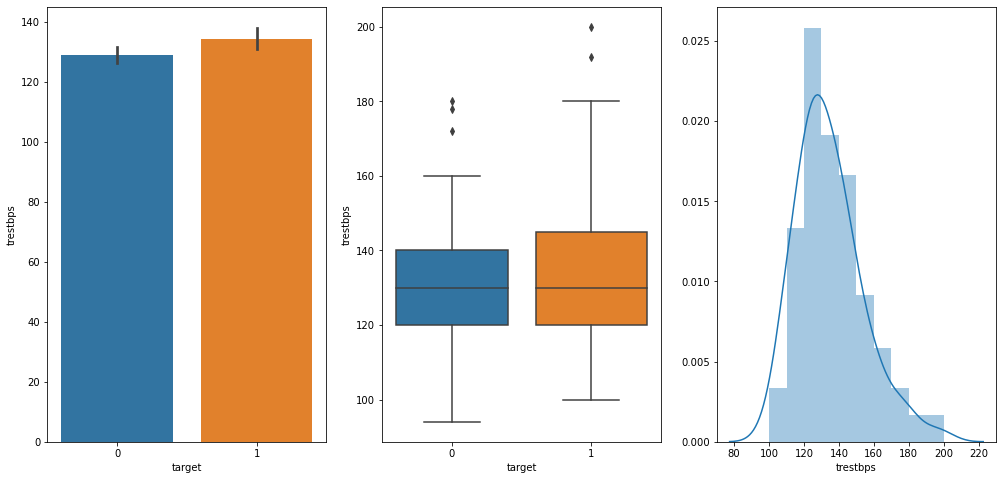

In [63]:
f,ax=plt.subplots(1,3,figsize=(17,8))
sns.barplot(hd_df['target'],hd_df['trestbps'],ax = ax[0])
sns.boxplot(hd_df['target'],hd_df['trestbps'],ax = ax[1])
sns.distplot(hd_df[hd_df['target'] == '1']['trestbps'],ax = ax[2])
plt.show()

The mean blood pressure for heart disease patients is more than 130
The peak value for trestbps distplot is also around 130.

In [64]:
hd_df[hd_df['target'] == '1']['trestbps'].value_counts()

120    13
140    13
130    11
110     9
150     8
125     7
160     6
128     4
132     4
112     4
145     4
124     3
138     3
134     2
136     2
152     2
126     2
170     2
100     2
180     2
118     2
108     2
123     1
122     1
135     1
117     1
174     1
165     1
144     1
200     1
146     1
192     1
158     1
178     1
142     1
Name: trestbps, dtype: int64

In [65]:
hd_df[hd_df['target'] == '1']['trestbps'].mode()

0    120
1    140
dtype: int64

The modal value being 120 and 140 (bimodal)

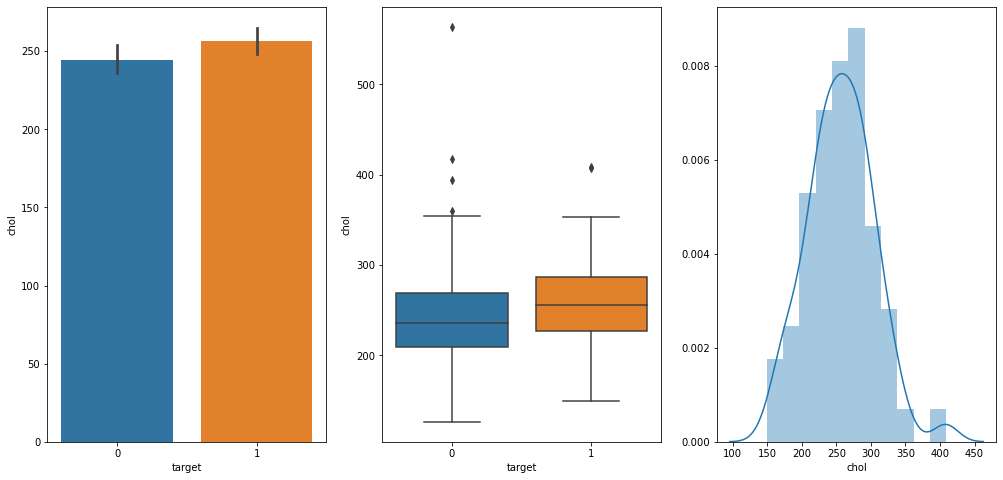

In [66]:
f,ax=plt.subplots(1,3,figsize=(17,8))
sns.barplot(hd_df['target'],hd_df['chol'],ax = ax[0])
sns.boxplot(hd_df['target'],hd_df['chol'],ax = ax[1])
sns.distplot(hd_df[hd_df['target'] == '1']['chol'],ax = ax[2])
plt.show()

In [67]:
hd_df[hd_df['target'] == '1']['chol'].mode()

0    254
1    282
dtype: int64

In [68]:
hd_df[hd_df['target'] == '1']['chol'].value_counts()

282    4
254    4
274    3
212    3
229    3
      ..
185    1
311    1
307    1
304    1
184    1
Name: chol, Length: 84, dtype: int64

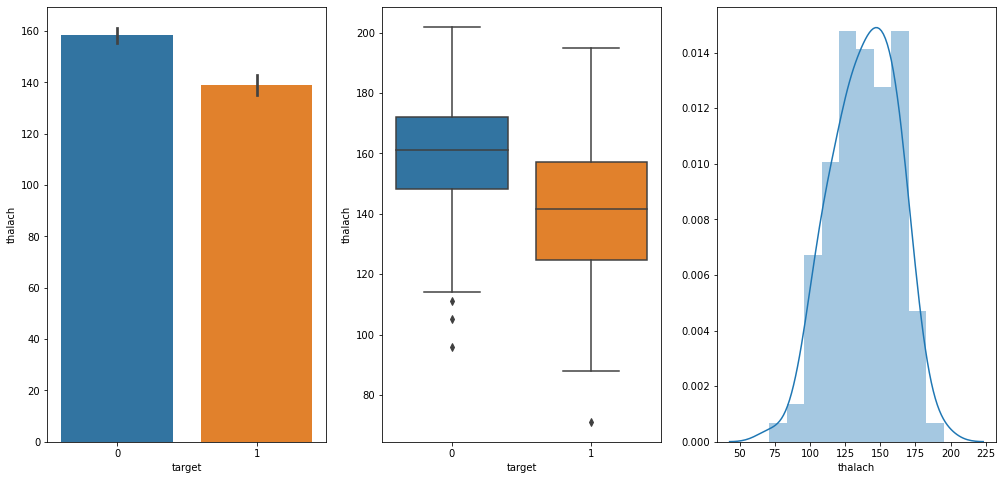

In [69]:
f,ax=plt.subplots(1,3,figsize=(17,8))
sns.barplot(hd_df['target'],hd_df['thalach'],ax = ax[0])
sns.boxplot(hd_df['target'],hd_df['thalach'],ax = ax[1])
sns.distplot(hd_df[hd_df['target'] == '1']['thalach'],ax = ax[2])
plt.show()

In [70]:
hd_df[hd_df['target'] == '1']['thalach'].mode()

0    125
1    132
dtype: int64

In [71]:
hd_df[hd_df['target'] == '1']['thalach'].value_counts()

125    5
132    5
142    4
160    4
150    4
      ..
174    1
171    1
170    1
166    1
128    1
Name: thalach, Length: 67, dtype: int64

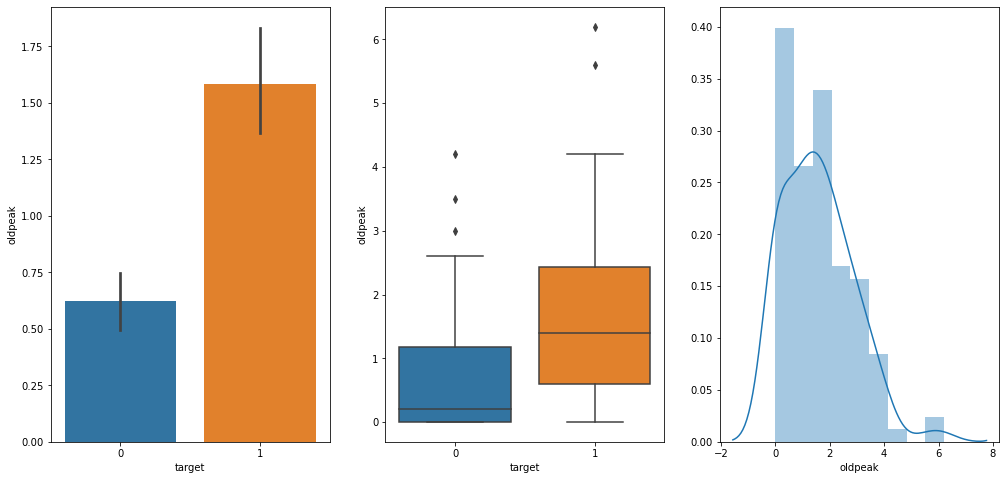

In [72]:
f,ax=plt.subplots(1,3,figsize=(17,8))
sns.barplot(hd_df['target'],hd_df['oldpeak'],ax = ax[0])
sns.boxplot(hd_df['target'],hd_df['oldpeak'],ax = ax[1])
sns.distplot(hd_df[hd_df['target'] == '1']['oldpeak'],ax = ax[2])
plt.show()

In [73]:
hd_df[hd_df['target'] == '1']['oldpeak'].mode()

0    0.0
dtype: float64

In [74]:
hd_df[hd_df['target'] == '1']['oldpeak'].value_counts()

0.0    22
1.2     8
1.0     8
1.4     7
1.8     7
2.0     6
2.6     5
3.6     4
2.8     4
2.2     4
0.8     4
1.6     4
0.6     4
3.0     3
1.9     3
2.5     2
2.4     2
4.0     2
0.2     2
3.4     2
0.1     2
0.9     2
3.2     2
0.3     1
2.9     1
3.1     1
6.2     1
1.5     1
0.4     1
0.5     1
5.6     1
3.8     1
4.2     1
2.1     1
Name: oldpeak, dtype: int64

# Categorical-Categorical

We are interested in seeing the relationships of target variable with other categorical variables

In [75]:
pd.crosstab(hd_df['sex'],hd_df['target'])

target,0,1
sex,,
0,67,20
1,83,100


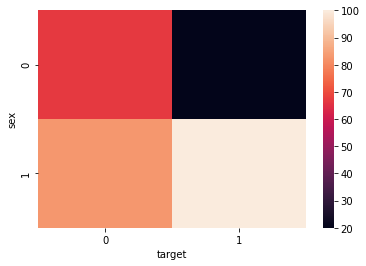

In [76]:
sns.heatmap(pd.crosstab(hd_df['sex'],hd_df['target']))

If a person is a male is at a greater risk of heart disease

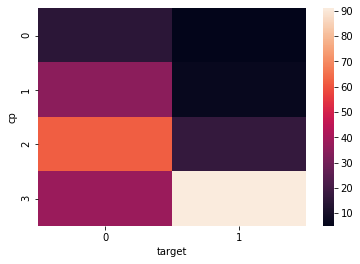

In [77]:
sns.heatmap(pd.crosstab(hd_df['cp'],hd_df['target']))

Patients with category 3 cp which is assymptotic chest pain have a greater chance of having heart disease

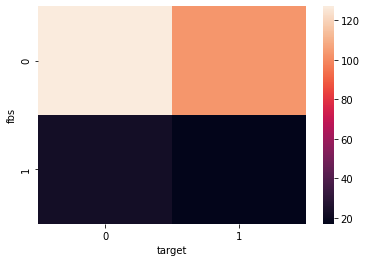

In [78]:
sns.heatmap(pd.crosstab(hd_df['fbs'],hd_df['target']))

In [79]:
pd.crosstab(hd_df['fbs'],hd_df['target'])

target,0,1
fbs,,
0,127,103
1,23,17


fbs is the blood sugar level. cat 1 means the person has a high blood sugar level with 1 means he does not have. This variable does not seem to have a relationship with heart disease

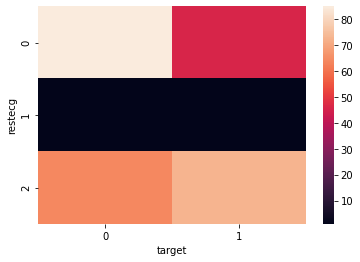

In [80]:
sns.heatmap(pd.crosstab(hd_df['restecg'],hd_df['target']))

In [81]:
pd.crosstab(hd_df['restecg'],hd_df['target'])

target,0,1
restecg,,
0,85,46
1,1,1
2,64,73


People wth category 2 of restecg which is "showing probable or definite left ventricular hypertrophyby Estes' criteria" have a greater chance of having heart disease

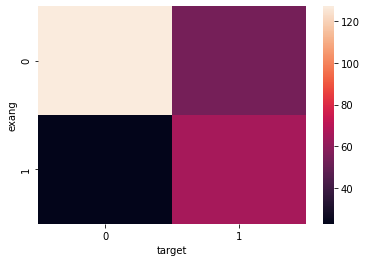

In [82]:
sns.heatmap(pd.crosstab(hd_df['exang'],hd_df['target']))

In [83]:
pd.crosstab(hd_df['exang'],hd_df['target'])

target,0,1
exang,,
0,127,54
1,23,66


exang is Angina (type of chest pain caused by reduced blood flow to the heart) induced by exercise. 0 means No and 1 means Yes. 67% is a no and 33% is a Yes. 

We can see that a person with exang = 1 is more prone to heart disease

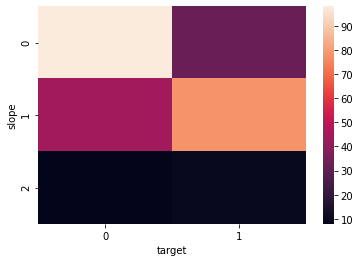

In [84]:
sns.heatmap(pd.crosstab(hd_df['slope'],hd_df['target']))

In [85]:
pd.crosstab(hd_df['slope'],hd_df['target'])

target,0,1
slope,,
0,98,32
1,44,78
2,8,10


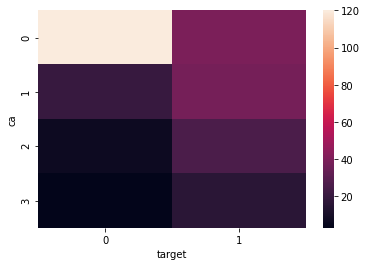

In [86]:
sns.heatmap(pd.crosstab(hd_df['ca'],hd_df['target']))

In [87]:
pd.crosstab(hd_df['ca'],hd_df['target'])

target,0,1
ca,,
0,120,40
1,20,38
2,7,26
3,3,16


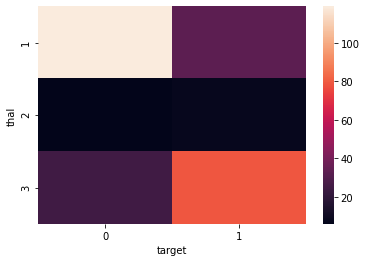

In [88]:
sns.heatmap(pd.crosstab(hd_df['thal'],hd_df['target']))

In [89]:
pd.crosstab(hd_df['thal'],hd_df['target'])

target,0,1
thal,,
1,119,33
2,6,8
3,25,79


thal is a blood disorder called thalassemia
0: NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart) 3: reversible defect (a blood flow is observed but it is not normal(nominal)

if a person has reversible defect that means he has a greater chance of heart disease

# Numerical-Numerical (Pairplot)

In [90]:
hd_df_n = hd_df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

In [91]:
hd_df_n.head()

,age,trestbps,chol,thalach,oldpeak
0,70,130,322,109,2.4
1,67,115,564,160,1.6
2,57,124,261,141,0.3
3,64,128,263,105,0.2
4,74,120,269,121,0.2


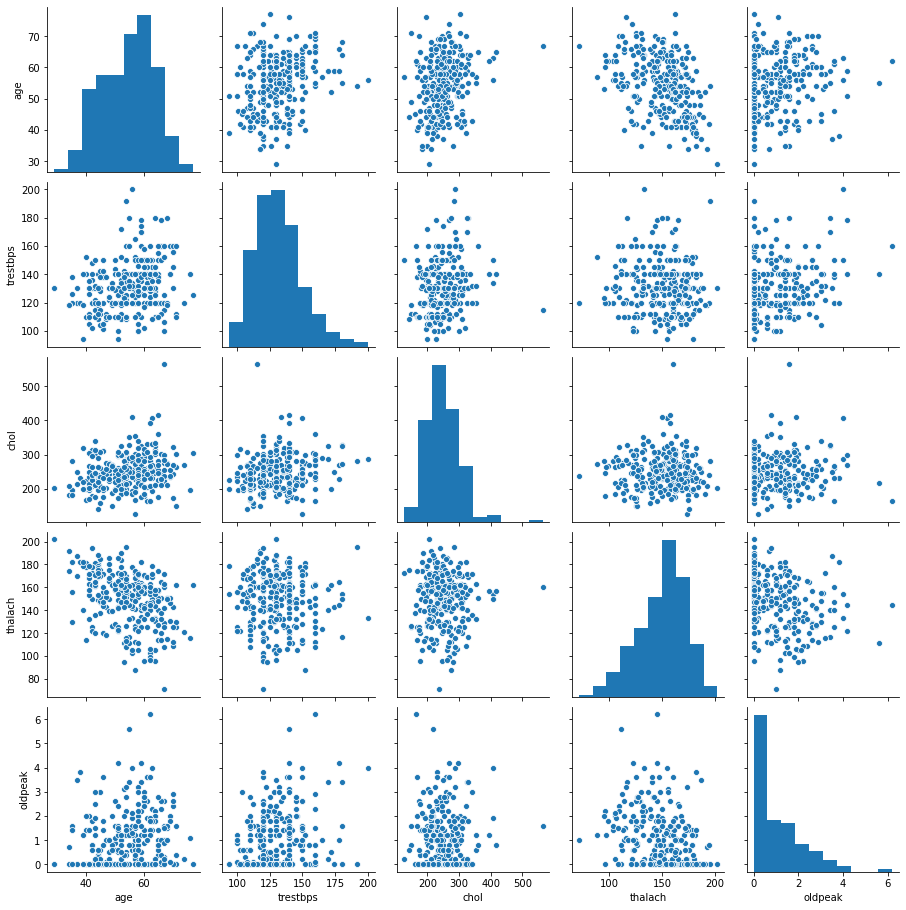

In [92]:
sns.pairplot(hd_df_n)